In [ ]:
About Dataset
#A large company with a substantial user base plans to increase sales through advertisement on its website.
#However, they are still undecided about whether the ads increase sales or not.
#In order to determine whether this is the case, 20000 customers were subjected to A/B testing for 31 days.


In [ ]:
#import the required library
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
data = pd.read_csv('online_ad_AB.csv')

#display the first few row
data.head()

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [ ]:
#display the information about the data
print(data.info)

<bound method DataFrame.info of        customerID test group  made_purchase  days_with_most_add  \
0               1         ad          False                  24   
1               2        psa          False                  21   
2               3        psa          False                   1   
3               4         ad          False                  20   
4               5         ad          False                   3   
...           ...        ...            ...                 ...   
19995       19996        psa          False                  17   
19996       19997         ad          False                  27   
19997       19998         ad          False                   6   
19998       19999         ad          False                  24   
19999       20000         ad          False                  22   

       peak ad hours  ad_count  
0                 20         5  
1                 16         9  
2                 18         8  
3                 23         7 

In [ ]:
data.isnull().sum()

,0
customerID,0
test group,0
made_purchase,0
days_with_most_add,0
peak ad hours,0
ad_count,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [ ]:
#state hypothesis
#Null Hypothesis: Ads have no effect on purchases.
#Alternative Hypothesis: Ads increase the likelihood of purchases.


In [ ]:
#identify the variables
#independent variables:ads, psa
#dependent variable: made_purchase

In [ ]:
#segment the data
group_a = data[data['test group']=='ad']['made_purchase']
group_b = data[data['test group']=='psa']['made_purchase']

print(group_a)

print(group_b)

0        False
3        False
4        False
5        False
6        False
         ...  
19993    False
19996    False
19997    False
19998    False
19999    False
Name: made_purchase, Length: 12053, dtype: bool
1        False
2        False
7        False
8        False
9        False
         ...  
19987    False
19989    False
19991    False
19994    False
19995    False
Name: made_purchase, Length: 7947, dtype: bool


In [ ]:
# Calculate the conversion rate for each group
conversion_rates = data.groupby('test group')['made_purchase'].mean()

# Display conversion rates for the 'ad' and 'psa' groups
ad_conversion_rate = conversion_rates['ad']
psa_conversion_rate = conversion_rates['psa']

print("Ad Group Conversion Rate:", ad_conversion_rate)
print("PSA Group Conversion Rate:", psa_conversion_rate)

Ad Group Conversion Rate: 0.06662241765535551
PSA Group Conversion Rate: 0.03233924751478545


In [ ]:
# Count of purchases in each group
group_a = data[data['test group']=='ad']['made_purchase'].sum()
group_b = data[data['test group']=='psa']['made_purchase'].sum()

print(group_a)
print(group_b)



803
257


In [ ]:
# Number of users in each group
ad_count = data[data['test group'] == 'ad'].shape[0]
psa_count = data[data['test group'] == 'psa'].shape[0]

print(ad_count)
print(psa_count)

12053
7947


In [ ]:
## Analyze completion rates - Categorical in nature - Chi-square test
## Generate a contingency table
contingency_table = pd.crosstab(data['test group'], data['made_purchase'])

print(contingency_table)

## Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-square:{chi2}, P-value:{p_value}")

made_purchase  False  True 
test group                 
ad             11250    803
psa             7690    257
Chi-square:111.4693275397143, P-value:4.669744271004884e-26


In [ ]:
## Conclusions based on P values
alpha = 0.05

## Completion status
if p_value < 0.05:
   print("Reject the Null hypothesis for Ads have no effect on purchase")
else:
   print("Fail to reject the Null hypothesis Ads have no effect on purchase")

Reject the Null hypothesis for Ads have no effect on purchase


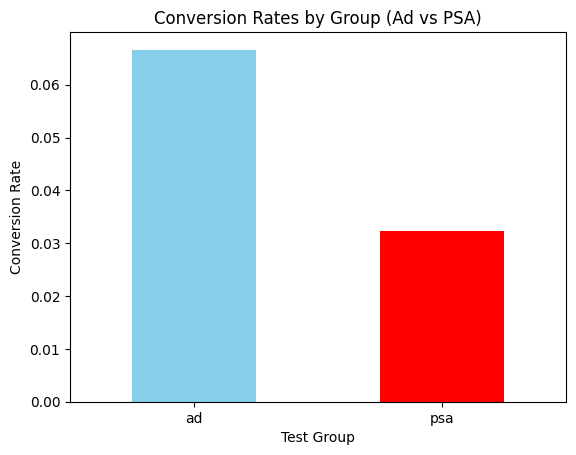

In [ ]:
#visualization of conversion by ad and psa
conversion_rates = data.groupby('test group')['made_purchase'].mean()

conversion_rates.plot(kind='bar', color=['skyblue', 'red'])
plt.title("Conversion Rates by Group (Ad vs PSA)")
plt.xlabel("Test Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.show()